In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:

with open(r"embdding_df.csv", "rb") as input_file:
    embedding_df = pickle.load(input_file)

In [3]:
with open('./NR1_ids.txt', 'r') as file:
    nr1_names = set(line.strip() for line in file)

with open('./NR4_ids.txt', 'r') as file:
    nr4_names = set(line.strip() for line in file)


def tag_node(info):
    if info in nr1_names:
        return 'NR1'
    elif info in nr4_names:
        return 'NR4'
    else:
        return 'Other'

# Apply the tagging function to the DataFrame
embedding_df['Clade'] = embedding_df['info'].apply(tag_node)



# subset_df.head(n=20)

## Add the interproscan results
NR_MSA_ancestors_unaligned.fa.tsv was generated on bioinfr using interproscan

In [4]:
column_names = [
        "info",
        "label",
        "sub_label",
        "description",
        "start",
        "stop",
        "score",
        "status",
        "date",
        "extended_description"
    ]
selected_columns = [0, 3, 4, 5, 6, 7, 8, 9, 10, 12]


interpro_df = pd.read_csv("./NR_MSA_ancestors_unaligned.fa.tsv", sep="\t", usecols=selected_columns, names=column_names)


In [5]:
interpro_df.head(n=5)

,info,label,sub_label,description,start,stop,score,status,date,extended_description
0,N2877,Gene3D,G3DSA:1.10.565.10,Retinoid X Receptor,3,233,2.1E-103,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
1,N2877,Pfam,PF00104,Ligand-binding domain of nuclear hormone receptor,41,217,3.6E-37,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"
2,N2877,PRINTS,PR00545,Retinoid X receptor signature,124,142,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
3,N2877,PRINTS,PR00545,Retinoid X receptor signature,98,123,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
4,N2877,PRINTS,PR00545,Retinoid X receptor signature,165,184,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4


In [15]:
# interpro_df[interpro_df['info'] == 'N9923']
interpro_df[interpro_df['info'] == 'N3281']

,info,label,sub_label,description,start,stop,score,status,date,extended_description
85073,N3281,PANTHER,PTHR24085,NUCLEAR HORMONE RECEPTOR,2,239,9.1E-78,T,03-09-2024,-
85074,N3281,SUPERFAMILY,SSF48508,Nuclear receptor ligand-binding domain,2,236,1.28E-85,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
85075,N3281,Gene3D,G3DSA:1.10.565.10,Retinoid X Receptor,1,237,2.6E-87,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
85076,N3281,Pfam,PF00104,Ligand-binding domain of nuclear hormone receptor,42,215,9.0E-39,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"
85077,N3281,PRINTS,PR00398,Steroid hormone receptor signature,136,151,7.4E-33,T,03-09-2024,Nuclear hormone receptor
85078,N3281,PRINTS,PR00398,Steroid hormone receptor signature,48,69,7.4E-33,T,03-09-2024,Nuclear hormone receptor
85079,N3281,PRINTS,PR00398,Steroid hormone receptor signature,193,210,7.4E-33,T,03-09-2024,Nuclear hormone receptor
85080,N3281,PRINTS,PR00398,Steroid hormone receptor signature,69,85,7.4E-33,T,03-09-2024,Nuclear hormone receptor
85081,N3281,ProSiteProfiles,PS51843,Nuclear receptor (NR) ligand-binding (LBD) dom...,1,234,75.633987,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"
85082,N3281,SMART,SM00430,holi,47,205,4.9E-54,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"


In [7]:
embedding_df.head(n=3)

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade
0,N0,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other
1,N1,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other
2,N2,TCAKLEPEDADENIDVTGNEPERTSTEYQMSPYPSASPESVYETSA...,yarongef/DistilProtBert,"[-0.17380047, 0.037478294, 0.049007155, -0.013...","[0.037427068, 0.075575374, -0.036185384, -0.23...","[0.12167235, 0.28130862, 0.21617526, 0.2462811...","[-0.10807977, 0.01987329, 0.028579468, -0.0042...",Other


In [8]:
interpro_df.head(n=5)

,info,label,sub_label,description,start,stop,score,status,date,extended_description
0,N2877,Gene3D,G3DSA:1.10.565.10,Retinoid X Receptor,3,233,2.1E-103,T,03-09-2024,Nuclear hormone receptor-like domain superfamily
1,N2877,Pfam,PF00104,Ligand-binding domain of nuclear hormone receptor,41,217,3.6E-37,T,03-09-2024,"Nuclear hormone receptor, ligand-binding domain"
2,N2877,PRINTS,PR00545,Retinoid X receptor signature,124,142,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
3,N2877,PRINTS,PR00545,Retinoid X receptor signature,98,123,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4
4,N2877,PRINTS,PR00545,Retinoid X receptor signature,165,184,1.6E-34,T,03-09-2024,Retinoid X receptor/HNF4


In [9]:
# Merge the two DataFrames on the 'ID' column
merged_df = embedding_df.merge(interpro_df, on='info', how='left')

# Pivot the merged DataFrame to create a column for each Database
pivot_df = merged_df.pivot_table(index='info', columns='label', values='extended_description', aggfunc=lambda x: '; '.join(x))

# Reset index to flatten the DataFrame
pivot_df = pivot_df.reset_index()
final_df = embedding_df.merge(pivot_df, on=['info'], how='left')

# Final_df

Now the final_df should have the sequence data, the embeddings, and the interpro details

In [41]:
# final_df.head(n=5)
display(final_df[final_df['info']=="N3281"])

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,FunFam,Gene3D,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY
3281,N3281,EELIEKLLEAHLETFPPTLSDFKKFREGGPPPDGGKADQEMFEQFS...,yarongef/DistilProtBert,"[-0.1553571, -0.016661184, 0.039532464, -0.066...","[0.07733889, 0.048346464, -0.024208635, -0.270...","[0.15463449, 0.3000791, 0.21957994, 0.1983978,...","[-0.086701415, -0.01423722, 0.0224734, -0.0315...",Other,NaN,NaN,NaN,Nuclear hormone receptor-like domain superfamily,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily


In [45]:
# Only include NR1 and NR4
subset_df = final_df[final_df['Clade'].isin(['NR1', 'NR4'])]

# Add in the parent of  N3281 in the subset
# additional_rows = embedding_df[embedding_df['info'] == 'N3281']
additional_rows = final_df[final_df['info'] == 'N3281']
subset_df = pd.concat([subset_df, additional_rows])

print(subset_df)

# List of substrings you want to check
substrings4 = ['subfamily 4', 'sub 4', 'Nurr77', 'NR4A1', 'NOR-1', 'HZF-3', 'nuclear hormone receptor 38']
# Join the substrings with '|' to create a regex pattern
pattern4 = '|'.join(substrings4)

# Use the pattern with str.contains
subset_df['has_subfamily4'] = subset_df['PRINTS'].str.contains(pattern4, na=False)

substrings1 = ['nuclear hormone receptor', 'retinoic acid']
pattern1 = '|'.join(substrings1)
subset_df['has_subfamily1'] = subset_df['PRINTS'].str.contains(pattern1, na=False)


# subset_df['has_subfamily_4'] = subset_df['PRINTS'].str.contains('subfamily 4', na=False)


         info                                           sequence  \
3282    N3282  EELIEKLLEAHLETFPPTLSDFKKFREGGPPPDGGKADQEMFEQFS...   
3283    N3283  EELIEKVLEAHLETFPPLSQFKKFREGGPPPDGGKADLEMFEQFSE...   
3284    N3284  WELIRVVTEAHMATIAQGNQWKQKRKFLPEDIGQGPVVNAPEGSKV...   
3285    N3285  WELIRVVTEAHMATNAQGNHWKQKRKFLPEDIGQAPIVNAPEGSKV...   
3286    N3286  WELIRVVTEAHMATNAQGNHWKQKRKFLPEDIGQAPIVNAPEGSKV...   
...       ...                                                ...   
11042  N11042  VSLITSLVRAHIDSVPSATKLDYSKFQESLSYQFEKEDCVDVQQFY...   
11043  N11043  VSLITSLVRAHIDSVPSATKLDYSKFQESLSYQFEKEDCVDVQQFY...   
11044  N11044  VSLITSLVRAHIDSVPSATKLDYSKFQESLSYQFEKEDCVDVQQFY...   
11045  N11045  VSLITSLVRAHIDSVPSATKLDYSKFQESLSYQFEKEDCVDVQQFY...   
3281    N3281  EELIEKLLEAHLETFPPTLSDFKKFREGGPPPDGGKADQEMFEQFS...   

                    model_name  \
3282   yarongef/DistilProtBert   
3283   yarongef/DistilProtBert   
3284   yarongef/DistilProtBert   
3285   yarongef/DistilProtBert   
3286   yarong

AttributeError: 'Series' object has no attribute 'contains'

In [43]:
# subset_df.head(n=5)

In [44]:
# # Set option to display all columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)  # Display full column width
# pd.set_option('display.max_rows', None)      # Display all rows

display(subset_df[subset_df['info']=="N3281"])
display(subset_df[subset_df['info']=="N9923"])

# # Reset display options to default after printing
# pd.reset_option('display.max_columns')

,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,...,Gene3D,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY,has_subfamily4,has_subfamily1
3281,N3281,EELIEKLLEAHLETFPPTLSDFKKFREGGPPPDGGKADQEMFEQFS...,yarongef/DistilProtBert,"[-0.1553571, -0.016661184, 0.039532464, -0.066...","[0.07733889, 0.048346464, -0.024208635, -0.270...","[0.15463449, 0.3000791, 0.21957994, 0.1983978,...","[-0.086701415, -0.01423722, 0.0224734, -0.0315...",Other,NaN,NaN,...,Nuclear hormone receptor-like domain superfamily,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,False,False


,info,sequence,model_name,protbert_mean_embedding,protbert_cls_embedding,protbert_max_embedding,protbert_weighted_embedding,Clade,CDD,Coils,...,Gene3D,MobiDBLite,PANTHER,PRINTS,Pfam,ProSiteProfiles,SMART,SUPERFAMILY,has_subfamily4,has_subfamily1
9923,N9923,VSLISSLVRAHIDSNPAATKLDYSKFQESVSYQSEKEDANDIQQFY...,yarongef/DistilProtBert,"[-0.21263374, 0.020814078, 0.062285744, -0.009...","[0.011768512, 0.10628107, -0.0346425, -0.22971...","[0.05944696, 0.27469152, 0.23495173, 0.2136580...","[-0.11766645, 0.0089208335, 0.03529136, 0.0002...",NR4,-,NaN,...,Nuclear hormone receptor-like domain superfamily,NaN,-,Nuclear hormone receptor; Nuclear hormone rece...,"Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain","Nuclear hormone receptor, ligand-binding domain",Nuclear hormone receptor-like domain superfamily,True,False


/var/folders/xj/l_c4n_qs0817y_gr39wb6pg80000gn/T/ipykernel_39208/967130774.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', num_unique).colors


NR1
NR4
Other


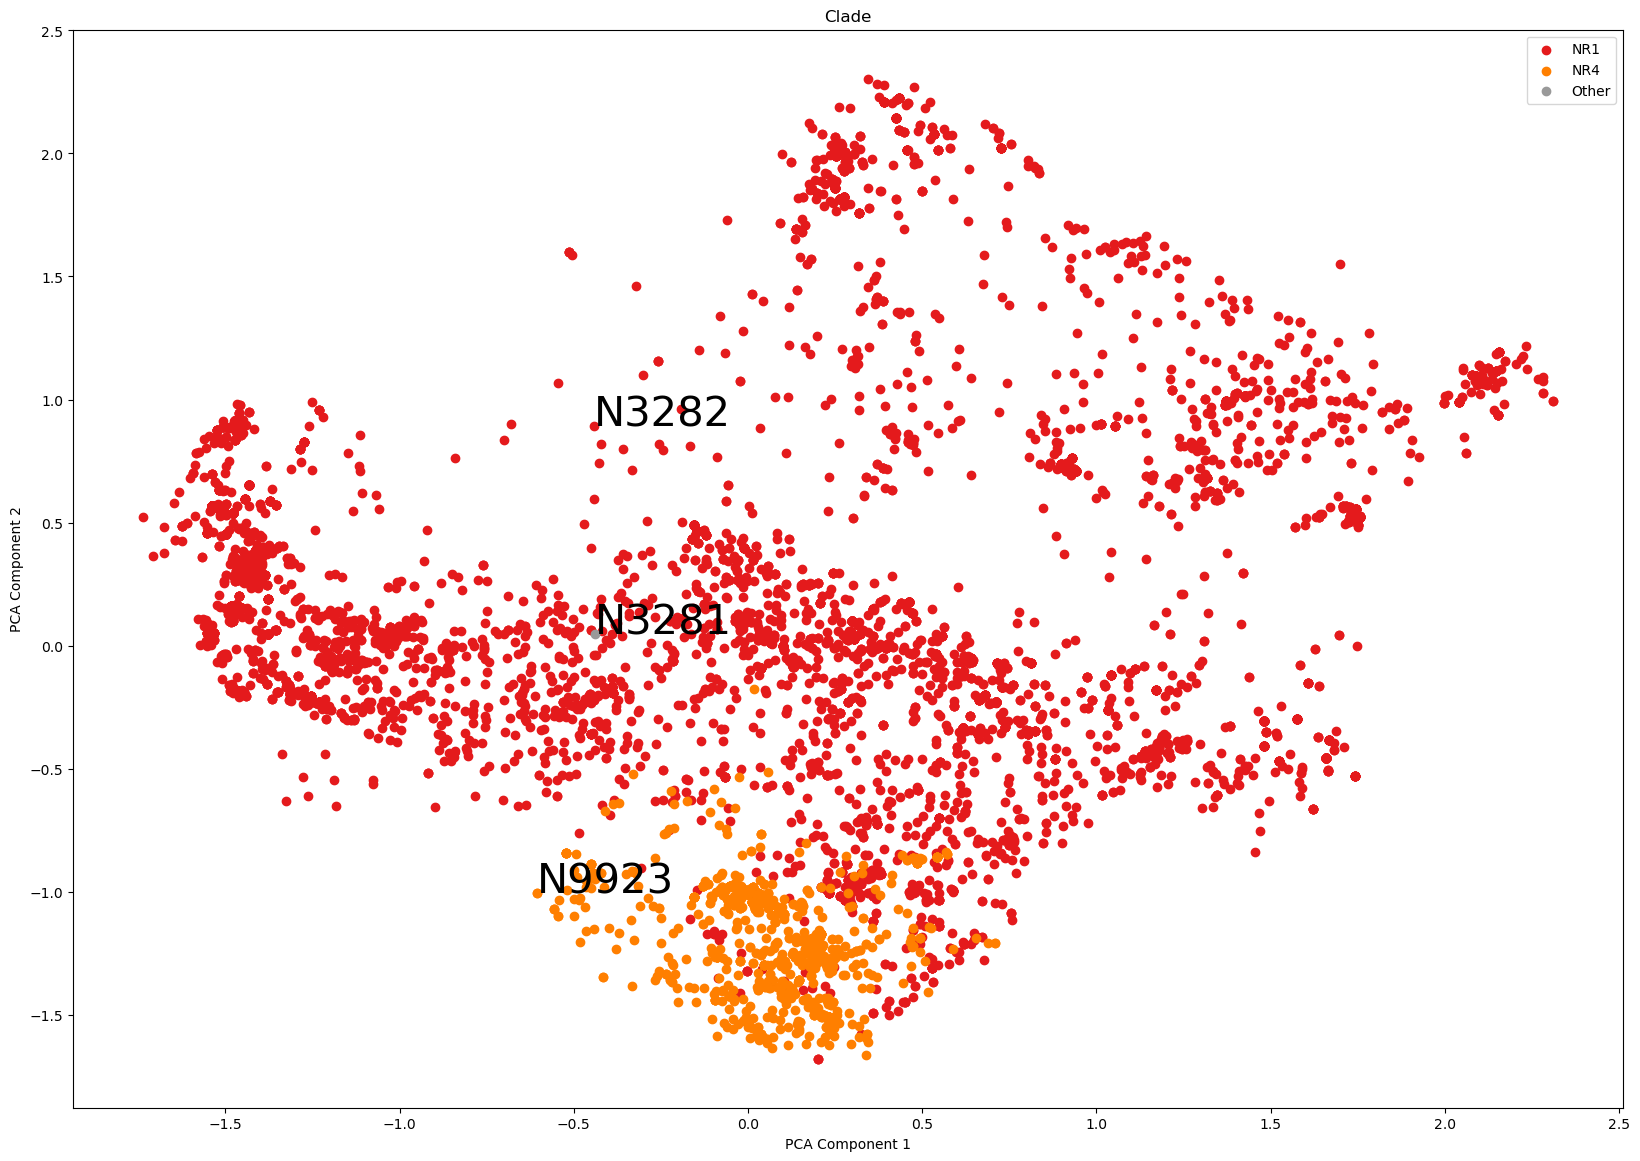

False
True


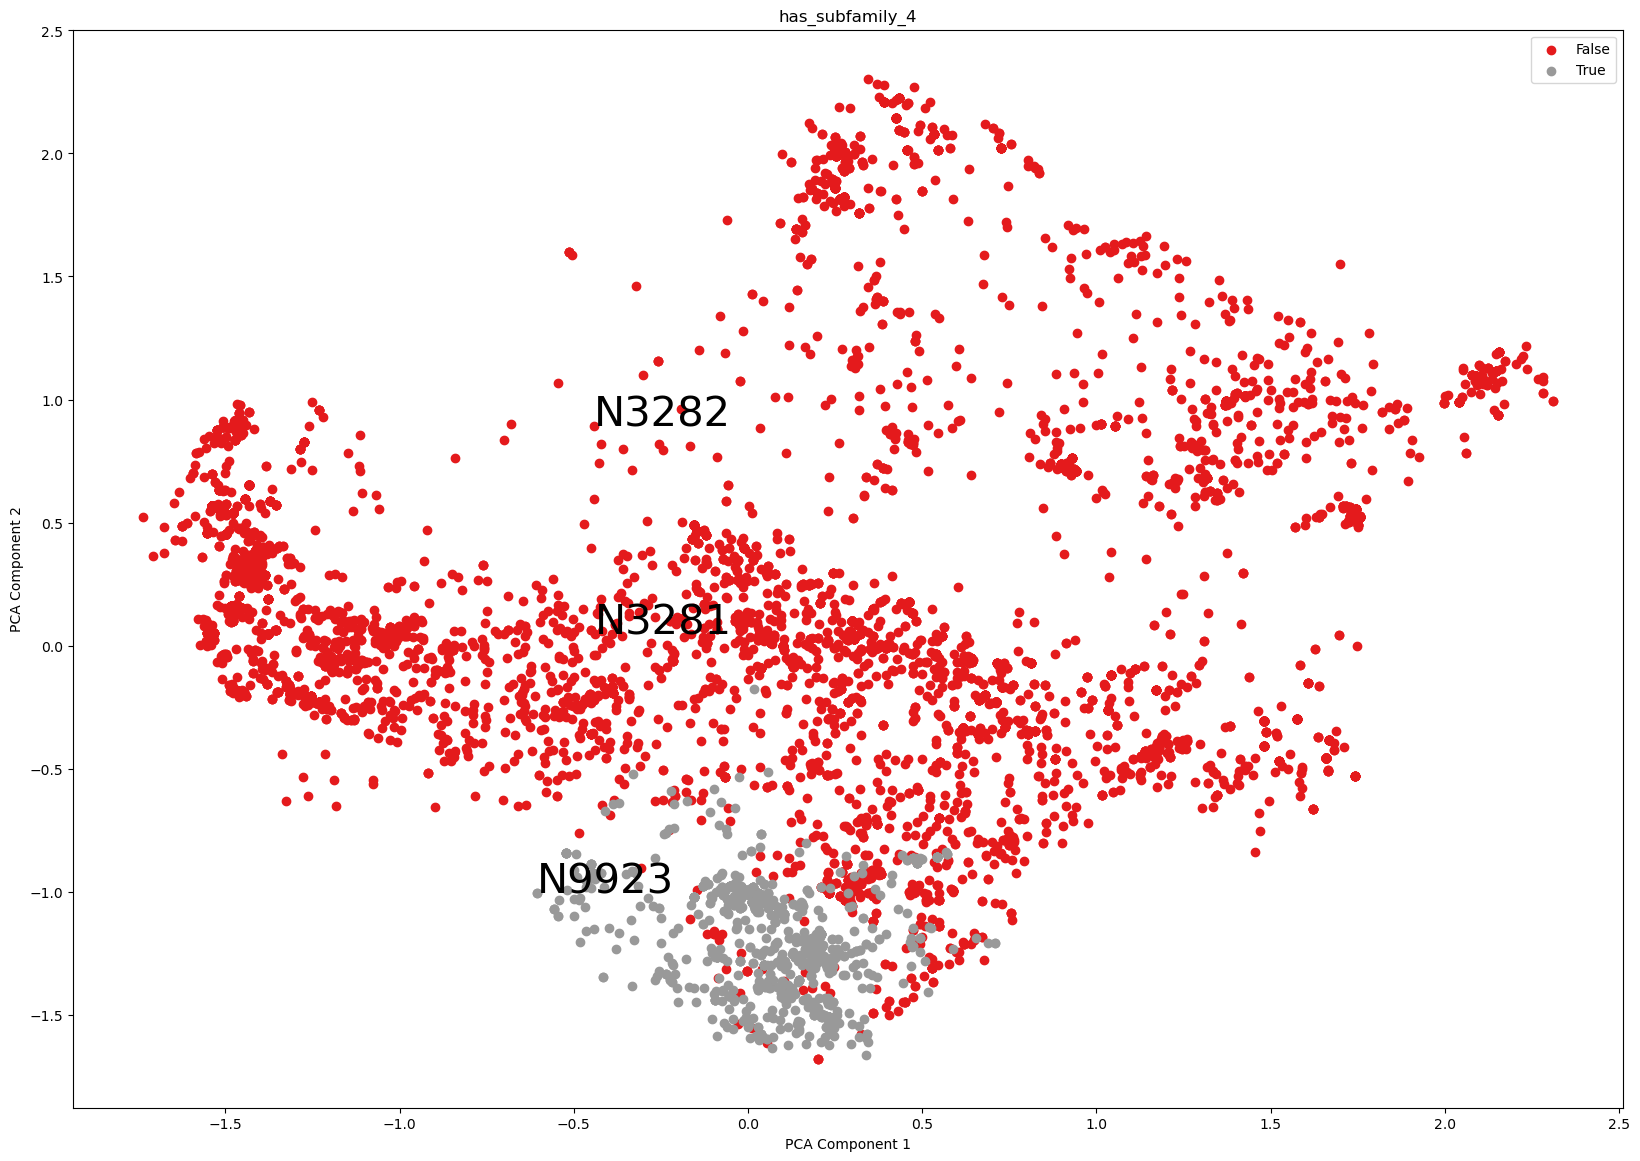

In [14]:



# Stack embeddings into a single numpy array
embeddings = np.vstack(subset_df['protbert_cls_embedding'].values)

# Apply PCA
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(embeddings)

# Add PCA results to the DataFrame
subset_df['pca1'] = pca_result[:, 0]
subset_df['pca2'] = pca_result[:, 1]


# for tag in ['tag', 'CDD', 'Coils', 'FunFam',
#        'Gene3D', 'MobiDBLite', 'PANTHER', 'PRINTS', 'Pfam', 'ProSiteProfiles',
#        'SMART', 'SUPERFAMILY', 'has_subfamily_4']:

nodes_to_label = ['N3281', 'N3282', 'N9923']

for tag in ['Clade', 'has_subfamily_4']:
    
    unique_tags = subset_df[tag].unique()
    num_unique = len(unique_tags)

    # Generate a color palette with enough colors
    colors = plt.cm.get_cmap('Set1', num_unique).colors
    # colors = plt.colormaps['plasma']

    plt.figure(figsize=(20, 14))
    for unique_tag, color in zip(unique_tags, colors):
    # for unique_tag in unique_tags:
        print(unique_tag) 
        subset = subset_df[subset_df[tag] == unique_tag]
        plt.scatter(subset['pca1'], subset['pca2'], label=unique_tag, color=color)

        # Label specific nodes
        for i, row in subset.iterrows():
            if row['info'] in nodes_to_label:
                plt.text(row['pca1'], row['pca2'], row['info'], fontsize=30, color='black')

    plt.title(tag)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()


